In [1]:
from datetime import datetime

In [2]:
import json
import pandas as pd

In [3]:
with open(r"C:\Users\ryno2\DATAINEMERGINGMEDIA\post_ryno_20210907\content\posts_1.json")as p:
          posts = json.load(p)

In [4]:
type(posts)

list

In [ ]:
posts[0:5]

In [ ]:
posts

In [7]:
posts[0]['media'][0]

{'uri': 'media/posts/201708/20686656_1954176268136038_3080836232477933568_n_17880278401104486.jpg',
 'creation_timestamp': 1501970774,
 'title': 'Splatoon complete amiibo set. #splatoon #nintendo #amiibo'}

In [8]:
posts[0].keys()

dict_keys(['media'])

In [9]:
ig_posts_data = [x['media'][0] for x in posts]

In [10]:
posts_df = pd.DataFrame(ig_posts_data)

In [11]:
posts_df.head()

,uri,creation_timestamp,title,media_metadata
0,media/posts/201708/20686656_1954176268136038_3...,1501970774,Splatoon complete amiibo set. #splatoon #ninte...,NaN
1,media/posts/201708/20634127_502707613406985_36...,1501731832,Zelda amiibo collection plus figures in front ...,NaN
2,media/posts/202008/117352955_3525450224132145_...,1597084971,"@owelband - ""I Dread The Night"" on red lathe c...",NaN
3,media/posts/202008/116435435_739091703597125_4...,1596483318,,NaN
4,media/posts/202007/110290865_304258537292588_5...,1595446390,,NaN


In [12]:
a_day = datetime.utcfromtimestamp(posts_df['creation_timestamp'][0])

In [13]:
a_day.year

2017

In [14]:
a_day.month

8

In [15]:
a_day.second

14

In [16]:
a_day.hour

22

In [17]:
another_day = datetime.utcfromtimestamp(posts_df['creation_timestamp'][80])

In [18]:
another_day - a_day

datetime.timedelta(days=145, seconds=2536)

In [19]:
another_day < a_day

False

In [20]:
import numpy

In [21]:
type(posts_df['creation_timestamp'][80])

numpy.int64

In [22]:
type(posts_df['creation_timestamp'][80]) == numpy.int64

True

In [23]:
posts_df['datetimes'] = [datetime.utcfromtimestamp(x) if type(x) == int else 0 for x in posts_df['creation_timestamp']]

In [24]:
posts_df['datetimes'] = [datetime.utcfromtimestamp(x) if type(x) == int else datetime.utcfromtimestamp(0) for x in posts_df['creation_timestamp']]

In [25]:
posts_df.head()

,uri,creation_timestamp,title,media_metadata,datetimes
0,media/posts/201708/20686656_1954176268136038_3...,1501970774,Splatoon complete amiibo set. #splatoon #ninte...,NaN,2017-08-05 22:06:14
1,media/posts/201708/20634127_502707613406985_36...,1501731832,Zelda amiibo collection plus figures in front ...,NaN,2017-08-03 03:43:52
2,media/posts/202008/117352955_3525450224132145_...,1597084971,"@owelband - ""I Dread The Night"" on red lathe c...",NaN,2020-08-10 18:42:51
3,media/posts/202008/116435435_739091703597125_4...,1596483318,,NaN,2020-08-03 19:35:18
4,media/posts/202007/110290865_304258537292588_5...,1595446390,,NaN,2020-07-22 19:33:10


In [26]:
posts_df = posts_df.sort_values('datetimes')

In [27]:
posts_df['deltas_since_first_post'] = [x - posts_df['datetimes'].iloc[0] for x in posts_df['datetimes']]

In [28]:
posts_df['days_since_first_post'] = [x.days for x in posts_df['deltas_since_first_post']]

In [29]:
posts_df.head()

,uri,creation_timestamp,title,media_metadata,datetimes,deltas_since_first_post,days_since_first_post
1,media/posts/201708/20634127_502707613406985_36...,1501731832,Zelda amiibo collection plus figures in front ...,NaN,2017-08-03 03:43:52,0 days 00:00:00,0
0,media/posts/201708/20686656_1954176268136038_3...,1501970774,Splatoon complete amiibo set. #splatoon #ninte...,NaN,2017-08-05 22:06:14,2 days 18:22:22,2
101,media/posts/201708/20904957_475892022775281_90...,1502910433,,NaN,2017-08-16 19:07:13,13 days 15:23:21,13
100,media/posts/201708/21042113_167674953801082_19...,1503707622,"Lyrics of the song ""I Am Not Yours"" by Owel ha...",NaN,2017-08-26 00:33:42,22 days 20:49:50,22
99,media/posts/201708/21225011_258560364653832_45...,1504215690,Mario + Rabbids: Kingdom Battle plus free Rabb...,NaN,2017-08-31 21:41:30,28 days 17:57:38,28


# October 28th in class

# histograms

In [30]:
from matplotlib import pyplot as plt

numers in the parenthesis after plt.subplots = number of columns and rows


i missed why to put 0 after fig and ax (i think just to like name it)

frequency of posts in a time from. for ex: 0 through 100 days from first post i made almost 25 posts

bins changes number of detail.

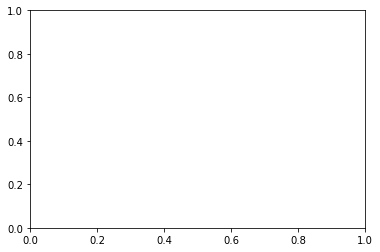

In [41]:
fig0, ax0 = plt.subplots(1, 1)

plt.show()

two columns and two rows of graphs

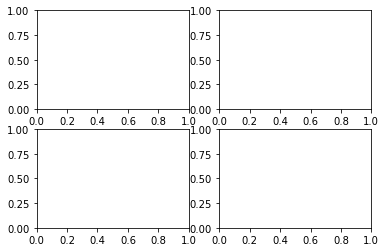

In [42]:
fig0, ax0 = plt.subplots(2, 2)

plt.show()

this uses my instagram data.

each bar represents a number of posts made in a given time. For example, the first bar represents about 25 posts made in 100 days

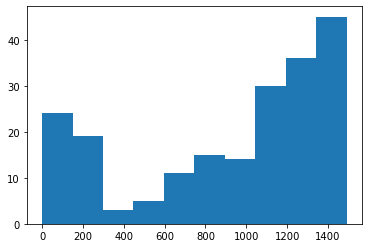

In [43]:
fig0, ax0 = plt.subplots(1, 1)
ax0.hist(posts_df['days_since_first_post'])
plt.show()

bins, iirc, essentially expand that data to make it more detailed. For example, the first bar is no longer for 100 days but for a shorter amount of time.

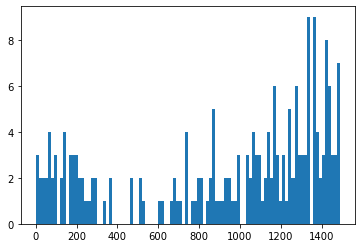

In [40]:
fig0, ax0 = plt.subplots(1, 1)
ax0.hist(posts_df['days_since_first_post'], bins = 100)
plt.show()

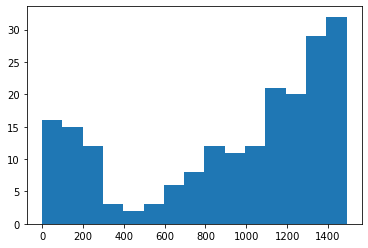

In [44]:
fig0, ax0 = plt.subplots(1, 1)
ax0.hist(posts_df['days_since_first_post'], bins = 15)
plt.show()

This creates 3 histograms and puts in the data on the 1th column.

need [1] after calling ax0 (which btw it can be anything: ax, ax1, ax2, etc i think as long as you call it the same as the first line

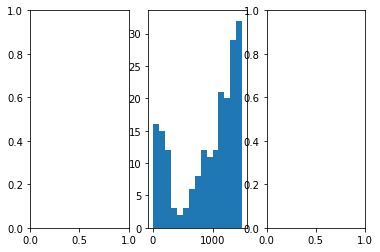

In [45]:
fig0, ax0 = plt.subplots(1, 3)
ax0[1].hist(posts_df['days_since_first_post'], bins = 15)

plt.show()

this creates 2 columns and 2 rows of histograms and shows you need  [0, 1] after ax0 to put data in the top right histogram

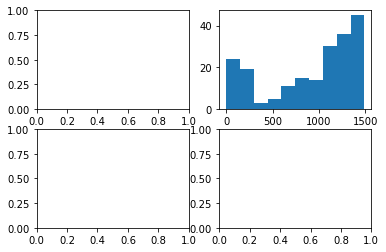

In [46]:
fig0, ax0 = plt.subplots(2, 2)

ax0[0, 1].hist(posts_df['days_since_first_post'], bins = 10)

plt.show()

this shows how to put data in the other histograms and how each can have different level of bins

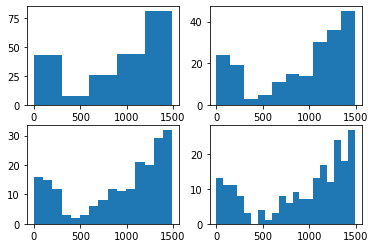

In [47]:
fig0, ax0 = plt.subplots(2, 2)
ax0[0, 0].hist(posts_df['days_since_first_post'], bins = 5)
ax0[0, 1].hist(posts_df['days_since_first_post'], bins = 10)
ax0[1, 0].hist(posts_df['days_since_first_post'], bins = 15)
ax0[1, 1].hist(posts_df['days_since_first_post'], bins = 20)
plt.show()

this shows using figsize to increase the size of the histograms and how to also add titles to each histogram.

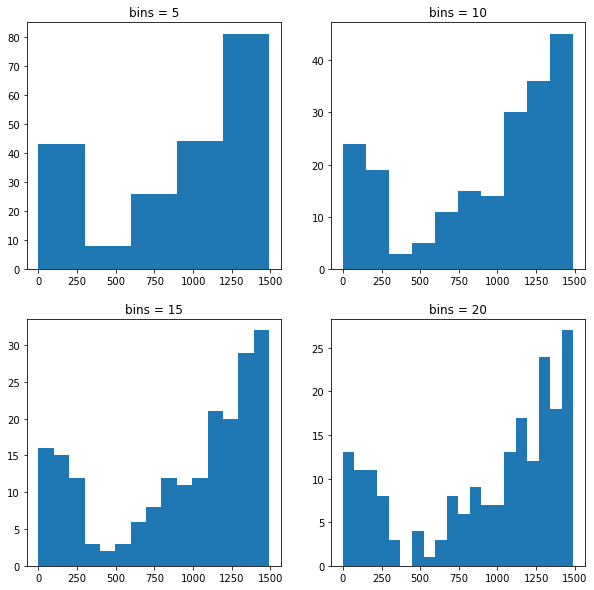

In [51]:
fig0, ax0 = plt.subplots(2, 2, figsize = (10, 10))
ax0[0, 0].hist(posts_df['days_since_first_post'], bins = 5)
ax0[0, 0].title.set_text("bins = 5")
ax0[0, 1].hist(posts_df['days_since_first_post'], bins = 10)
ax0[0, 1].title.set_text("bins = 10")
ax0[1, 0].hist(posts_df['days_since_first_post'], bins = 15)
ax0[1, 0].title.set_text("bins = 15")
ax0[1, 1].hist(posts_df['days_since_first_post'], bins = 20)
ax0[1, 1].title.set_text("bins = 20")
plt.show()

alpha = shading of bars
can layer on top of each other, hence why bars are purple
can also have two different data sets on top of each other.

ex.
ax2.hist(Instagram_posts_df['days_since_first_post'], bins = 15, color = 'red', alpha = .5)
ax2.hist(Facebook_posts_df['days_since_first_post'], bins = 15, color = 'blue', alpha = .5)

he went fast and said you didnt need to follow along hence why i only have the color example and not an example of two graphs on top of each other

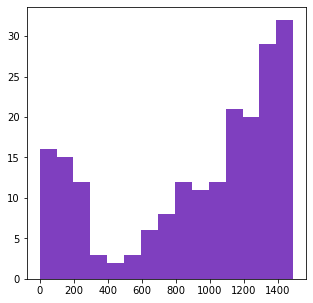

In [54]:
fig2, ax2 = plt.subplots(1, 1, figsize = (5, 5))
ax2.hist(posts_df['days_since_first_post'], bins = 15, color = 'red', alpha = .5)
ax2.hist(posts_df['days_since_first_post'], bins = 15, color = 'blue', alpha = .5)
plt.show()

# Box plots

this shit is literally copied and pasted from canvas lol.

the "data" thats used is in the 2nd cell. seems like you can also just your time stamp data. unsure how useful it is he had us do this section on our own.

"visual of a uni-variable distribution."
boxplots measure "central tendency"
usually show 68% of data. box shows the mean of the data. "whiskers" on the side show deviation. 

if this doesnt make sense im sorry he always goes so fast when trying to copy down other things lol.
box plots seem to show the mean of data (using the box in the middle) and deviations (the lines to the side of it, called whiskers)

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [56]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))


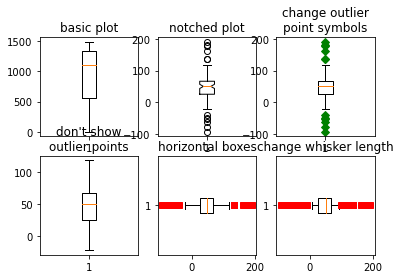

In [68]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(posts_df['days_since_first_post'])
axs[0, 0].set_title('basic plot')

axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')


plt.show()

# pie charts

again copied from canvas

we didnt have time to really work and finish this.

In [ ]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# non-class related notes. guest came in.


looks like we are stopping here. someone came in to talk about two classes for next semester.

"immersive media and journalism (mdj 40295)
-making 360 degree videos for virtual reality

anowitz@kent.edu
contact to wave requirements to get in class

"Children's Lit in Augmented Reality" EMAT 35091 or DI 30100
-how can ar be used for new forms of innovative children's literature?
emat - more technical
di - design thinking to develop innovative solutions

jrcamp@kent.edu (jr campbell. permission to register for di section)

